In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pprint


## Part 1: Getting the Data
## get SVEN's portfolio




In [7]:
#######################
import myauz
from myauz.myalpha_funcs import (
    read_data,
    persist_data,
    update_csv,
    compose_portfolio,
    retrieveDF,
    string2date,
    retrievePF,
    initialize_df,
    time_sleep,
    create_path_list,
    refresh_db,
    get_daily_symbol,
)

from myauz.myalpha_libs_universal import StocksDb

import pprint


from datetime import date
import datetime
import pandas as pd



In [2]:
alphaDB = StocksDb()
alphaDB.check_path()
print("\n", alphaDB.api_key_alpha, alphaDB.path)
print("\n\n")
api_key_alpha = alphaDB.api_key_alpha
root_path = alphaDB.path
read_from_alphavantage = False
rename_column = True


usecols = ["timestamp", "adjusted_close"]
startd = "2020-01-01"
endd = "2020-08-30"


Directory  ../data  already exists

 77K8XPSR3XWWZJ80 ..





In [2]:
#symbol_list = ["DHR", "GOOG"]

symbol_list = [
   "MSFT",
   "GOOG",    
   "AMZN",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

path_list = create_path_list(symbol_list, root_path)
pprint.pprint(path_list)

bool_list_all = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
   True, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

bool_list_high_tech = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
   True, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_industry = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
   False, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_consumer = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
   False, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

colors = [
    'magenta',
    'lime',
    'tab:orange',
    'tab:blue',
    'black',
    'slategrey',
    'tab:brown',
    'steelblue',
    'darkviolet',
    'red',
    'crimson',
    'forestgreen',
    'gold',
]

color_dict = dict(zip(symbol_list, colors))
print('\n')
print(color_dict)



{'MSFT': 'magenta', 'GOOG': 'lime', 'AMZN': 'tab:orange', 'DHR': 'tab:blue', 'EMR': 'black', 'ATR': 'slategrey', 'HXGBY': 'tab:brown', 'NVS': 'steelblue', 'NVZMY': 'darkviolet', 'CL': 'red', 'MCD': 'crimson', 'HEINY': 'forestgreen', 'LDSVF': 'gold'}


Directory  ../data  already exists

 77K8XPSR3XWWZJ80 ..



{'AMZN': '../data/AMZN/daily_AMZN.csv',
 'ATR': '../data/ATR/daily_ATR.csv',
 'CL': '../data/CL/daily_CL.csv',
 'DHR': '../data/DHR/daily_DHR.csv',
 'EMR': '../data/EMR/daily_EMR.csv',
 'GOOG': '../data/GOOG/daily_GOOG.csv',
 'HEINY': '../data/HEINY/daily_HEINY.csv',
 'HXGBY': '../data/HXGBY/daily_HXGBY.csv',
 'LDSVF': '../data/LDSVF/daily_LDSVF.csv',
 'MCD': '../data/MCD/daily_MCD.csv',
 'MSFT': '../data/MSFT/daily_MSFT.csv',
 'NVS': '../data/NVS/daily_NVS.csv',
 'NVZMY': '../data/NVZMY/daily_NVZMY.csv'}


In [2]:
#df[cols].plot(color = [color_dict.get(x, _) for x in df.columns])

Directory  ../data  already exists

 77K8XPSR3XWWZJ80 ..



{'AMZN': '../data/AMZN/daily_AMZN.csv',
 'ATR': '../data/ATR/daily_ATR.csv',
 'CL': '../data/CL/daily_CL.csv',
 'DHR': '../data/DHR/daily_DHR.csv',
 'EMR': '../data/EMR/daily_EMR.csv',
 'GOOG': '../data/GOOG/daily_GOOG.csv',
 'HEINY': '../data/HEINY/daily_HEINY.csv',
 'HXGBY': '../data/HXGBY/daily_HXGBY.csv',
 'LDSVF': '../data/LDSVF/daily_LDSVF.csv',
 'MCD': '../data/MCD/daily_MCD.csv',
 'MSFT': '../data/MSFT/daily_MSFT.csv',
 'NVS': '../data/NVS/daily_NVS.csv',
 'NVZMY': '../data/NVZMY/daily_NVZMY.csv'}


{'MSFT': 'magenta', 'GOOG': 'lime', 'AMZN': 'tab:orange', 'DHR': 'tab:blue', 'EMR': 'black', 'ATR': 'slategrey', 'HXGBY': 'tab:brown', 'NVS': 'steelblue', 'NVZMY': 'darkviolet', 'CL': 'red', 'MCD': 'crimson', 'HEINY': 'forestgreen', 'LDSVF': 'gold'}


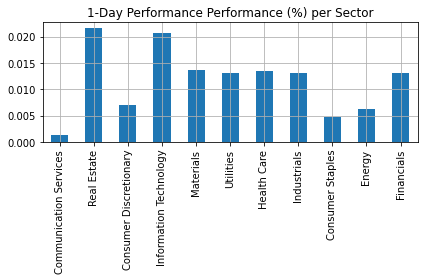

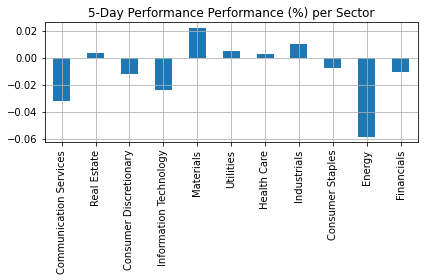

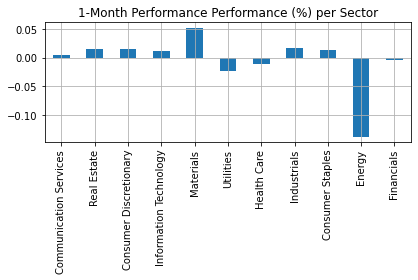

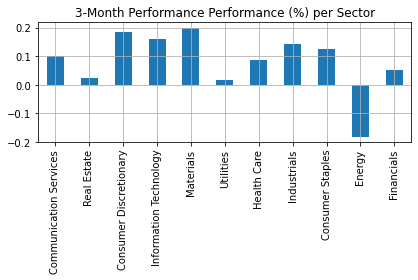

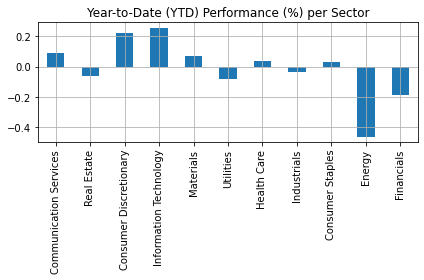

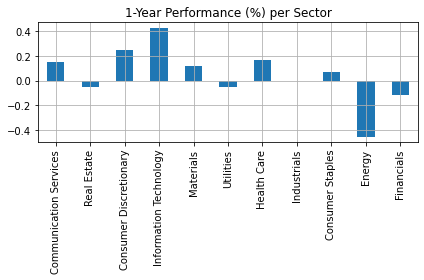

['Rank A: Real-Time Performance',
 'Rank B: 1 Day Performance',
 'Rank C: 5 Day Performance',
 'Rank D: 1 Month Performance',
 'Rank E: 3 Month Performance',
 'Rank F: Year-to-Date (YTD) Performance',
 'Rank G: 1 Year Performance',
 'Rank H: 3 Year Performance',
 'Rank I: 5 Year Performance',
 'Rank J: 10 Year Performance']


In [4]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key=api_key_alpha, output_format='pandas')
data, meta_data = sp.get_sector()
data.head()


data['Rank B: Day Performance'].plot(kind='bar')
plt.title('1-Day Performance Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();

data['Rank C: Day Performance'].plot(kind='bar')
plt.title('5-Day Performance Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();

data['Rank D: Month Performance'].plot(kind='bar')
plt.title('1-Month Performance Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();

data['Rank E: Month Performance'].plot(kind='bar')
plt.title('3-Month Performance Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();

data['Rank F: Year-to-Date (YTD) Performance'].plot(kind='bar')
plt.title('Year-to-Date (YTD) Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();

data['Rank G: Year Performance'].plot(kind='bar')
plt.title('1-Year Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();


pprint.pprint([
    "Rank A: Real-Time Performance",
    "Rank B: 1 Day Performance",
    "Rank C: 5 Day Performance",
    "Rank D: 1 Month Performance",
    "Rank E: 3 Month Performance",
    "Rank F: Year-to-Date (YTD) Performance",
    "Rank G: 1 Year Performance",
    "Rank H: 3 Year Performance",
    "Rank I: 5 Year Performance",
    "Rank J: 10 Year Performance"
])

# Full refresh of DB con time delay
# use refresh_db(root_path, api_key_alpha, symbol_list, False)


In [5]:
#import csv data from alpha_vantage from scratch (everything since year 2000) and store it in data folder
#create a data folder
#example: import csv data for Procter&Gamble and SPY (etf which mimicks S&P 500 index)
#you alway need to import and store a symbol once you can work with its csv.
#if you don't the ticker symbol use alpha vantage for google sheets functionality (extension)
#after importing extension and registered you api_key use formula =AVSearchEquitySymbol("<some symbol_description")
#example: =AVSearchEquitySymbol("bayer") this will output for example the ticker-symbol: BAYN.DEX

symbol_list_full_refresh = [
   "MSFT",
   "GOOG",    
   "AMZN",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

symbol_list_full_refresh = [
    "AAPL",
    "PG",
]
#refresh apple stock as a split happened in Sept 2020



_dict, _path_list = read_data(root_path, api_key_alpha, symbol_list_full_refresh)

# persist_data(symbol_list_full_refresh, _dict, _path_list)
full_refresh_alphavantage = True

refresh_db(root_path, api_key_alpha, symbol_list_full_refresh)


('Directory ', '../data/AAPL', ' already exists')
('_____________________________', 2)
AAPL 1
('Directory ', '../data/PG', ' already exists')
('_____________________________', 2)
PG 2
('Directory ', '../data/AAPL', ' already exists')
('_____________________________', 1)
AAPL 1
<built-in method values of dict object at 0x7f6e6e7f78>
('\n\t', '../data/AAPL/daily_AAPL.csv')
('Last Modified Time : ', '2020-09-15 20:58:26')
2020-09-15 20:58:26
('Directory ', '../data/PG', ' already exists')
('_____________________________', 1)
PG 1
<built-in method values of dict object at 0x7f6f2405e8>
('\n\t', '../data/PG/daily_PG.csv')
('Last Modified Time : ', '2020-09-15 20:58:40')
2020-09-15 20:58:40


In [6]:
### create dataframe with portfolio adjusted close
usecols = ["timestamp", "adjusted_close"]
pf = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf) 

                MSFT     GOOG     AMZN       DHR      EMR       ATR   HXGBY  \
2020-01-02  159.3574  1367.37  1898.01  154.7471  75.7006  112.6190  57.600   
2020-01-03  157.3731  1360.66  1874.97  153.7893  74.6650  112.9756  56.040   
2020-01-06  157.7799  1394.21  1902.88  154.2483  75.2805  112.9855  55.855   
2020-01-07  156.3413  1393.34  1906.86  155.7647  75.4661  111.8562  55.930   
2020-01-08  158.8316  1404.32  1891.97  155.9243  75.7299  112.1633  55.790   
...              ...      ...      ...       ...      ...       ...     ...   
2020-08-24  213.6900  1588.20  3307.46  205.5600  69.6500  119.1100  69.040   
2020-08-25  216.4700  1608.22  3346.49  207.5700  69.7800  118.1300  69.170   
2020-08-26  221.1500  1652.38  3441.85  208.1900  70.2700  118.6000  70.670   
2020-08-27  226.5800  1634.33  3400.00  204.3900  69.5900  120.0500  71.760   
2020-08-28  228.9100  1644.41  3401.80  205.6400  70.6500  118.1300  72.060   

                NVS    NVZMY       CL       MCD    

In [7]:
### create dataframe with volumes of portfolio
usecols = ["timestamp", "volume"]
pf_vol = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf_vol)

                  MSFT     GOOG     AMZN      DHR      EMR     ATR  HXGBY  \
2020-01-02  22622100.0  1406731  4035910  2585100  2532300  362700  10819   
2020-01-03  21116200.0  1187006  3766604  2329043  2672600  221500   6915   
2020-01-06  20813700.0  1733149  4065698  2747987  3787200  282400   4923   
2020-01-07  21634100.0  1511693  4134010  1987168  2497000  234700  11162   
2020-01-08  27746500.0  1529177  3511966  2788122  2554300  331000   2829   
...                ...      ...      ...      ...      ...     ...    ...   
2020-08-24  25460147.0  1410229  4666258  1226870  2539101  223991   8051   
2020-08-25  23043696.0  2132084  3992842  1449040  2094858  114372   5932   
2020-08-26  39600828.0  3581072  6508743  1140998  2901710  119970  11910   
2020-08-27  57602195.0  1861602  4264795  2551303  2122765  209790   5600   
2020-08-28  26292896.0  1499782  2896978  1387082  2049656  295204   7599   

                NVS  NVZMY       CL      MCD   HEINY  LDSVF  
2020-01-02  1

## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

In [8]:
# filter columns(symbols) in dataframe  by bool_list(symbols = True - this is the _included list)
def pf_filtered(_pf, _startd, _included):
    if not (_startd):
        _startd = '2020-01-01'
    if _included is []:
        return _pf
    else: 
        return _pf.loc[startd:,_included]

from itertools import compress
def symbol_list_filtered(_symbol_list,_included):
    #filter the symbol_list
    #symbol_list_filtered = [i for indx,i in enumerate(symbol_list) if included[indx]]
    return list(compress(_symbol_list, _included))
    

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

In [9]:
#startd_new = string2date('2020-07-01')
#endd_new = string2date('2020-08-01')


startd = '2020-01-01'
included = bool_list_high_tech
#pf1 = pf.loc[startd:,:]
#pf1 = pf.loc[startd:,bool_list_consumer]
#pf1_vol = pf_vol.loc[startd:,:]
#pf1_vol = pf_vol.loc[startd:,bool_list_consumer]
pf1 = pf_filtered(pf,startd,included)
pf1_vol = pf_filtered(pf_vol,startd,included)

pprint.pprint(pf1.head(3))
print('\n')
pprint.pprint(pf1_vol.head(3))

                MSFT     GOOG     AMZN
2020-01-02  159.3574  1367.37  1898.01
2020-01-03  157.3731  1360.66  1874.97
2020-01-06  157.7799  1394.21  1902.88


                  MSFT     GOOG     AMZN
2020-01-02  22622100.0  1406731  4035910
2020-01-03  21116200.0  1187006  3766604
2020-01-06  20813700.0  1733149  4065698


In [10]:
pprint.pprint(color_dict)
print(pf.columns)

{'AMZN': 'tab:orange',
 'ATR': 'slategrey',
 'CL': 'red',
 'DHR': 'tab:blue',
 'EMR': 'black',
 'GOOG': 'lime',
 'HEINY': 'forestgreen',
 'HXGBY': 'tab:brown',
 'LDSVF': 'gold',
 'MCD': 'crimson',
 'MSFT': 'magenta',
 'NVS': 'steelblue',
 'NVZMY': 'darkviolet'}
Index(['MSFT', 'GOOG', 'AMZN', 'DHR', 'EMR', 'ATR', 'HXGBY', 'NVS', 'NVZMY',
       'CL', 'MCD', 'HEINY', 'LDSVF'],
      dtype='object')


magenta


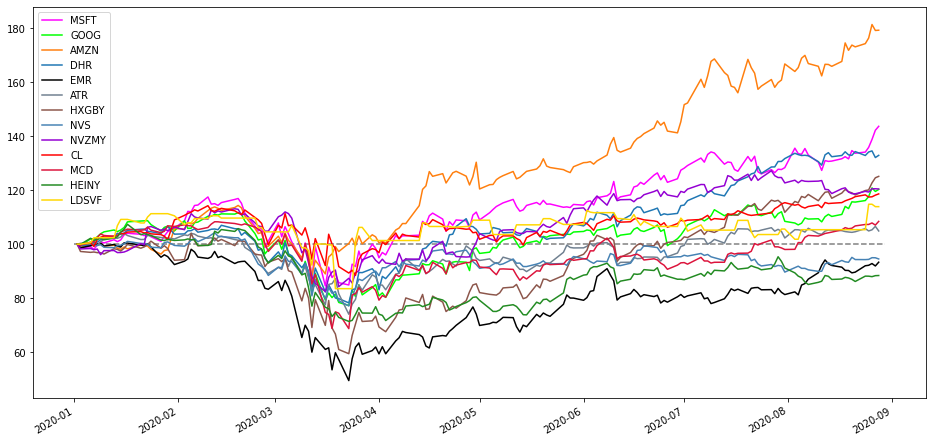

In [11]:
#print(pf.iloc[0])
print(color_dict.get('MSFT'))

color_list = [color_dict.get(x, _) for x in pf.columns]

(pf / pf.iloc[0] * 100).plot(color=color_list, figsize=(16, 8))
plt.hlines(100, startd,endd,colors='gray', linestyles='--')
plt.legend(loc=2);

____

** Plot the Volume of stock traded each day.**

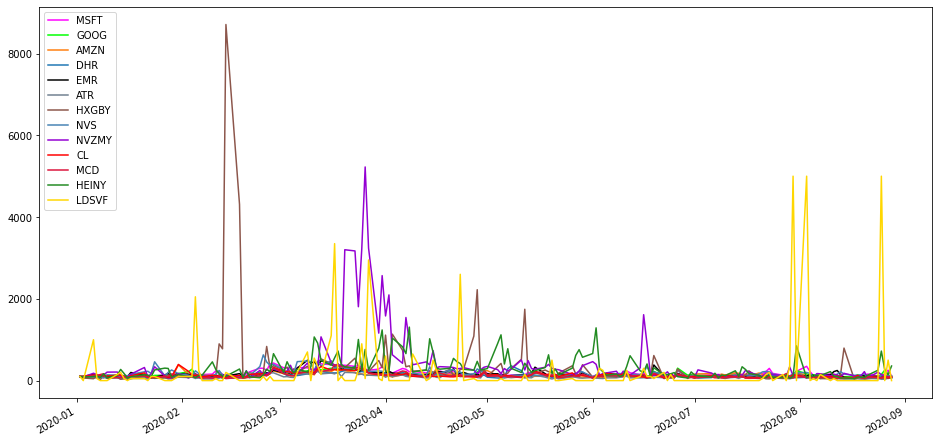

In [12]:
pf_vol.iloc[0]
(pf_vol / pf_vol.iloc[0] * 100).plot(color=color_list,figsize=(16, 8))

plt.legend(loc=2);

In [13]:
pf_vol.max()
pf_vol.idxmax()

MSFT    2020-02-28
GOOG    2020-06-26
AMZN    2020-01-31
DHR     2020-05-08
EMR     2020-03-09
ATR     2020-06-26
HXGBY   2020-02-14
NVS     2020-02-25
NVZMY   2020-03-26
CL      2020-01-31
MCD     2020-03-17
HEINY   2020-04-08
LDSVF   2020-07-30
dtype: datetime64[ns]

MSFT     159.3574
GOOG    1367.3700
AMZN    1898.0100
Name: 2020-01-02 00:00:00, dtype: float64


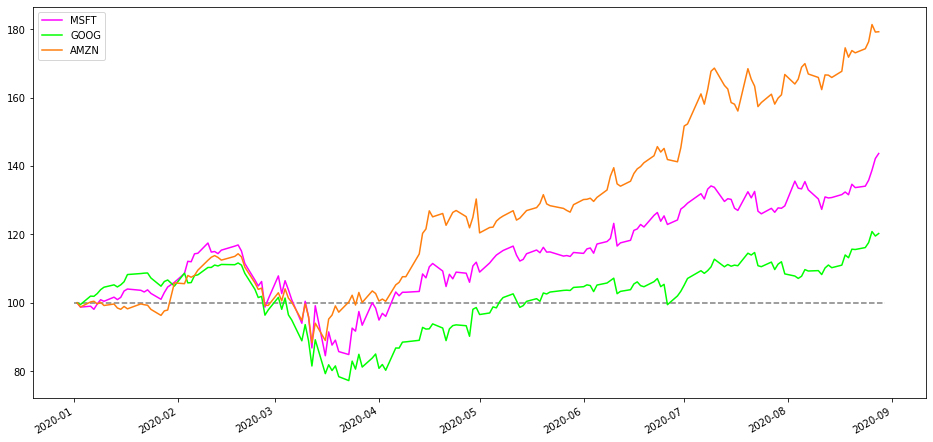

In [14]:
print(pf1.iloc[0])

(pf1 / pf1.iloc[0] * 100).plot(color=color_list,figsize=(16, 8))
plt.hlines(100, startd,endd,colors='gray', linestyles='--')
plt.legend(loc=2);

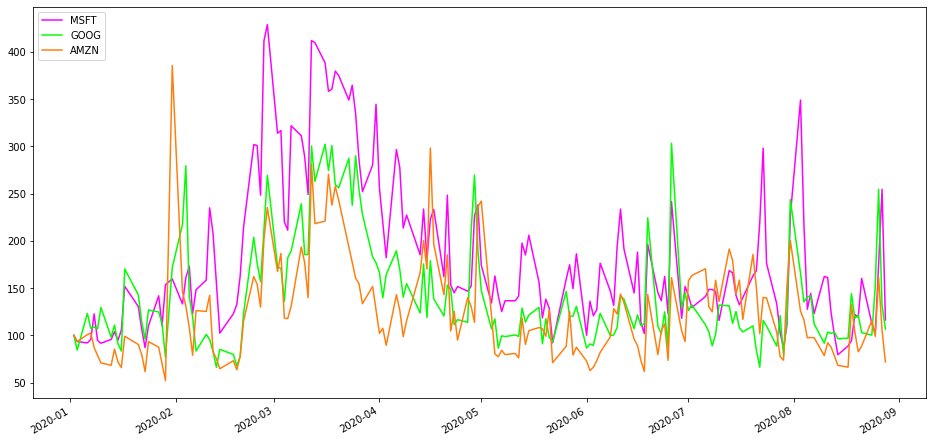

In [15]:
pf1_vol.iloc[0]
(pf1_vol / pf1_vol.iloc[0] * 100).plot(color=color_list,figsize=(16, 8))

plt.legend(loc=2);

**Bonus: What happened that day? **

In [16]:
#rewrite retrieve

In [17]:
pf1_vol.max()

    

MSFT    97073600.0
GOOG     4267698.0
AMZN    15567283.0
dtype: float64

In [18]:
pf1_vol.idxmax()

MSFT   2020-02-28
GOOG   2020-06-26
AMZN   2020-01-31
dtype: datetime64[ns]

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

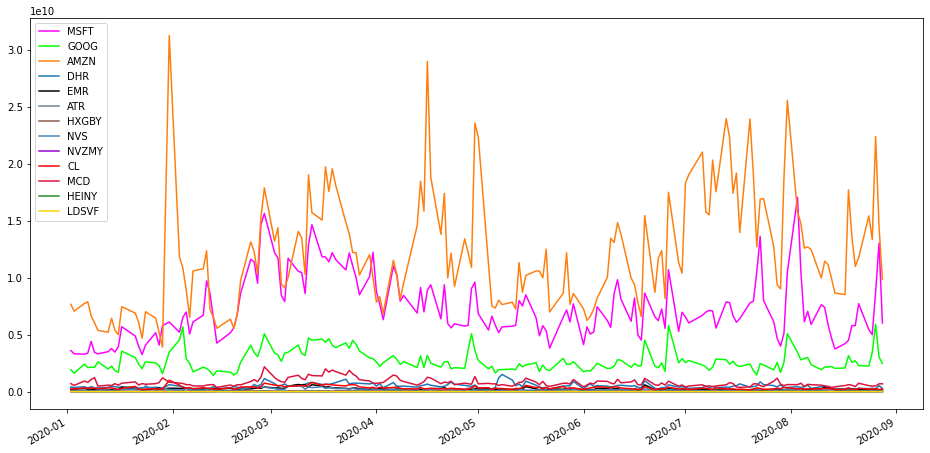

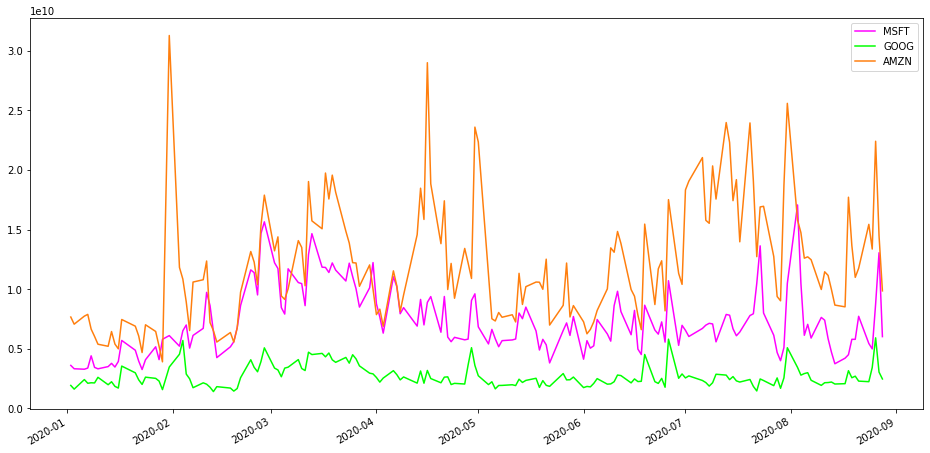

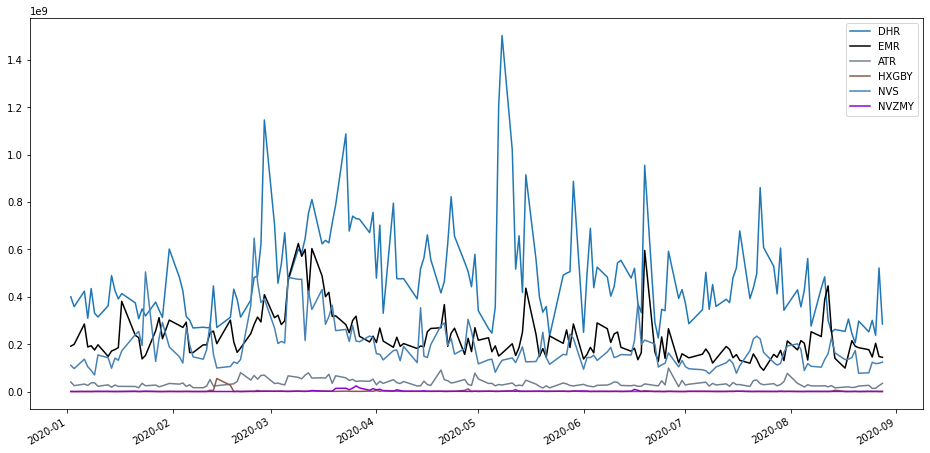

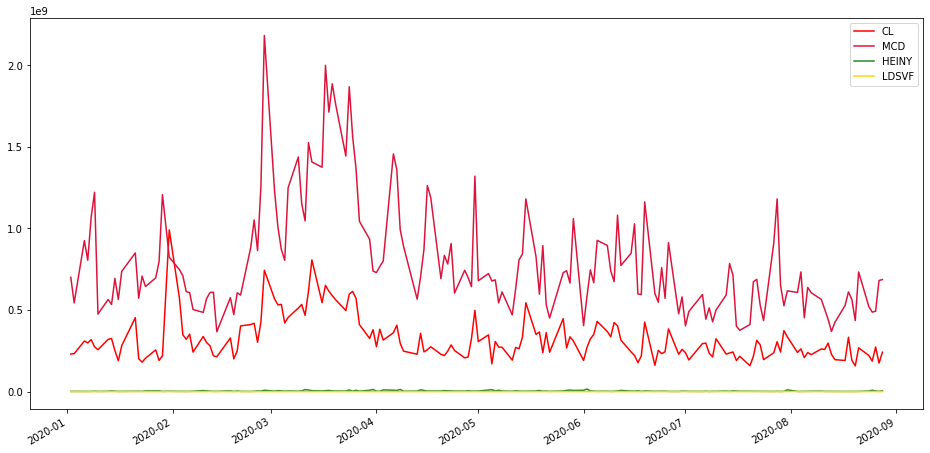

In [19]:
df_cap = initialize_df(symbol_list, startd, endd)

df_cap=pf*pf_vol

df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
df_cap.plot(color=color_list,figsize=(16,8))
plt.legend();


df_cap=pf1*pf1_vol
df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
df_cap.plot(color=color_list,figsize=(16,8))
plt.legend();


pf2 = pf_filtered(pf,startd,bool_list_industry)
pf2_vol = pf_filtered(pf_vol,startd,bool_list_industry)
df_cap=pf2*pf2_vol
df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
color_list = [color_dict.get(x, _) for x in pf2.columns]
df_cap.plot(color=color_list,figsize=(16,8))
plt.legend();


pf3 = pf_filtered(pf,startd,bool_list_consumer)
pf3_vol = pf_filtered(pf_vol,startd,bool_list_consumer)
df_cap=pf3*pf3_vol
df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
color_list = [color_dict.get(x, _) for x in pf3.columns]
df_cap.plot(color=color_list,figsize=(16,8))
plt.legend();

** Plot this "Total Traded" against the time index.**

In [20]:
df_cap.idxmax()


CL      2020-01-31
MCD     2020-02-28
HEINY   2020-06-02
LDSVF   2020-08-25
dtype: datetime64[ns]

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

            MSFT  adj.close  MA20  MA50
2020-01-02     0   159.3574   NaN   NaN
2020-01-03     0   157.3731   NaN   NaN
2020-01-06     0   157.7799   NaN   NaN
2020-01-07     0   156.3413   NaN   NaN
2020-01-08     0   158.8316   NaN   NaN


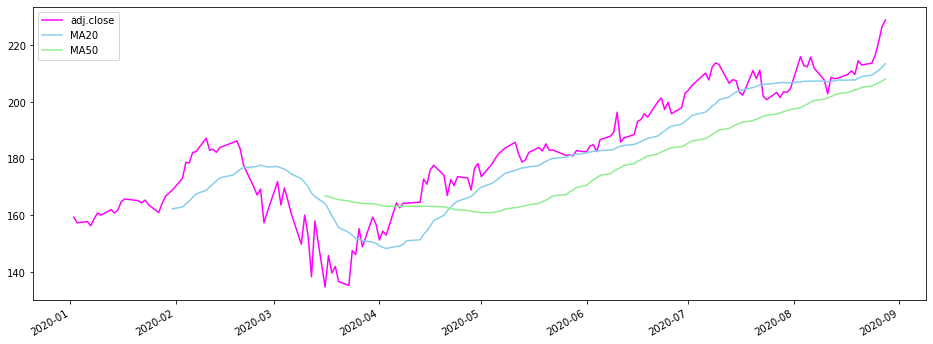

In [21]:
# Code here
MSFT = initialize_df(['MSFT'], '2020-01-01', endd)

MSFT['adj.close'] = pf['MSFT']
MSFT.dropna(inplace=True)
MSFT['MA20']=pf['MSFT'].rolling(window=20).mean()
MSFT['MA50']=pf['MSFT'].rolling(window=50).mean()
color_list = [color_dict.get(x, _) for x in pf.columns]
MSFT[['adj.close','MA20','MA50']].plot(color=['magenta','skyblue','lightgreen'],figsize=(16,6));
print(MSFT.head())


______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [22]:
#car_comp = pd.concat([tesla["open"],gm['open'],ford['open']], axis = 1)

#car_comp.columns = ['Tesla','GM','Ford']

#car_comp.head()

#scatter_matrix(car_comp,figsize=(8,8), alpha=0.2, hist_kwds={'bins':50});
# alpha - it is darker where points overlap

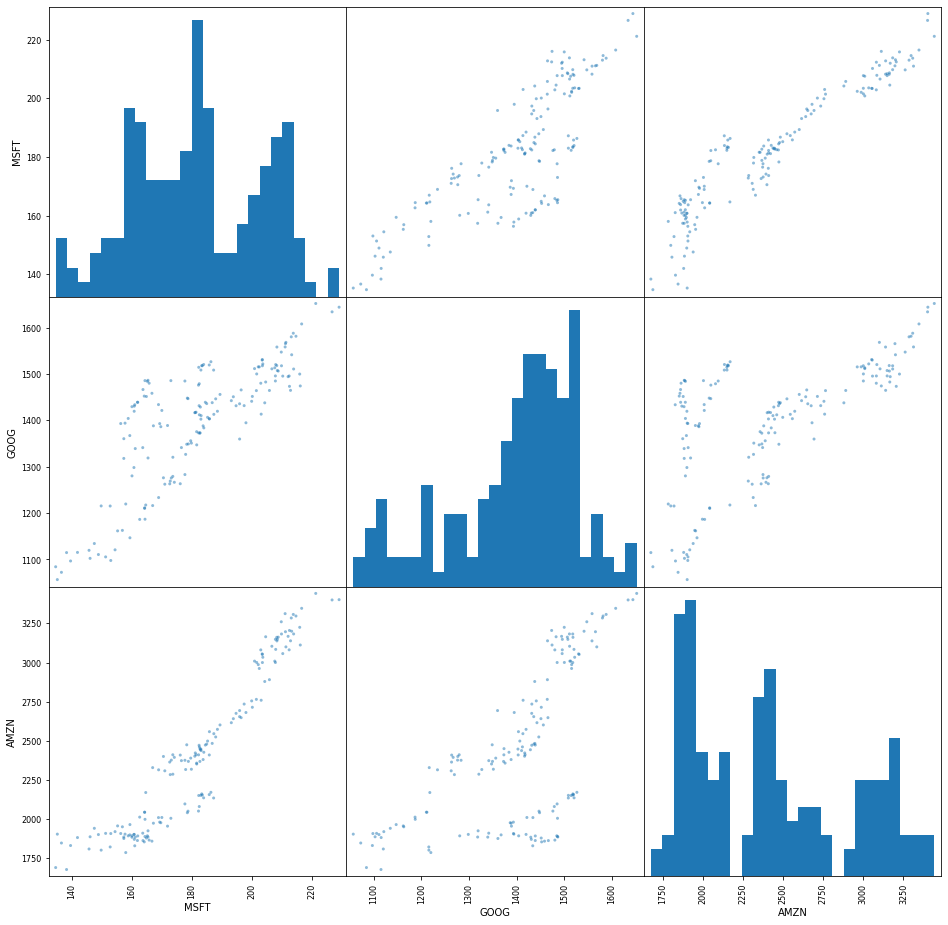

In [23]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(pf, figsize=(16,16),alpha=0.2, hist_kwds={'bins':25});

# alpha - it is darker where points overlap

from pandas.plotting import scatter_matrix
scatter_matrix(pf1, figsize=(16,16),alpha=0.5, hist_kwds={'bins':25});
# alpha - it is darker where points overlap

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [24]:
#tesla['returns'] = (tesla['close']/tesla['close'].shift(1))-1
#tesla.head()

In [25]:
#tesla['returns']=tesla['close'].pct_change(1)
#tesla.head()
#gm['returns']=gm['close'].pct_change(1)
#ford['returns']=ford['close'].pct_change(1)

In [26]:
df_returns = (pf/pf.shift(1))-1
#ret = pf.pct_change(1)
pprint.pprint(df_returns.head(2))


print('\n')
df1_returns = (pf1/pf1.shift(1))-1
pprint.pprint(df1_returns.head(3))


print('\n')
df2_returns = (pf2/pf2.shift(1))-1
pprint.pprint(df2_returns.head(3))


print('\n')
df3_returns = (pf3/pf3.shift(1))-1
pprint.pprint(df3_returns.head(3))



                MSFT      GOOG      AMZN       DHR      EMR       ATR  \
2020-01-02       NaN       NaN       NaN       NaN      NaN       NaN   
2020-01-03 -0.012452 -0.004907 -0.012139 -0.006189 -0.01368  0.003166   

               HXGBY       NVS     NVZMY        CL       MCD     HEINY  LDSVF  
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN    NaN  
2020-01-03 -0.027083 -0.001685 -0.017599 -0.001469 -0.003536 -0.000561    0.0  


                MSFT      GOOG      AMZN
2020-01-02       NaN       NaN       NaN
2020-01-03 -0.012452 -0.004907 -0.012139
2020-01-06  0.002585  0.024657  0.014886


                 DHR       EMR       ATR     HXGBY       NVS     NVZMY
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN
2020-01-03 -0.006189 -0.013680  0.003166 -0.027083 -0.001685 -0.017599
2020-01-06  0.002985  0.008243  0.000088 -0.003301  0.006751  0.001458


                  CL       MCD     HEINY     LDSVF
2020-01-02       NaN       NaN     

** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

In [27]:
#ford['returns'].hist(bins=50, figsize=(10,8), alpha=0.4, color='forestgreen')
#tesla['returns'].hist(bins=50, figsize=(10,8), alpha=0.4, color='steelblue')
#gm['returns'].hist(bins=50, figsize=(10,8), alpha=0.2, color='darkorange');

In [28]:
#ford['returns'].plot(kind='kde', figsize=(10,8), label='Ford', color='forestgreen')
#tesla['returns'].plot(kind='kde', figsize=(10,8), label='Tesla', color='steelblue')
#gm['returns'].plot(kind='kde', figsize=(10,8), label='GM', color='darkorange');
#plt.legend();

In [29]:
#df_returns= pd.concat([tesla['returns'], ford['returns'], gm['returns']], axis=1)
#df_returns.columns = ['Tesla', 'Ford', 'GM']
#df_returns.plot(kind='box', figsize=(8,11))

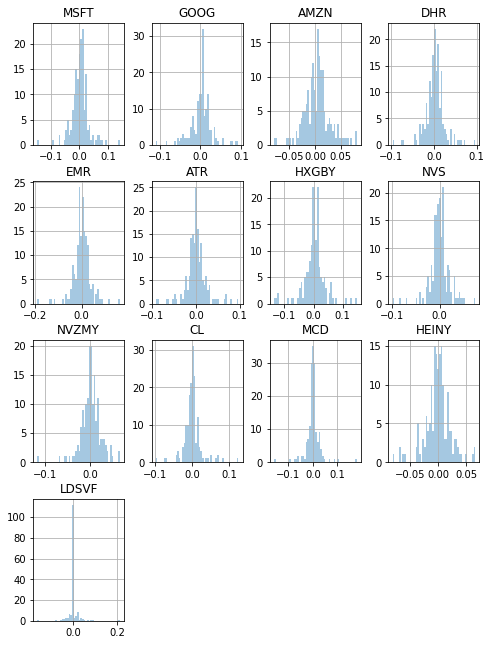

In [30]:
df_returns.hist(bins=50,figsize=(8,11),alpha=0.4);


<Figure size 432x288 with 0 Axes>

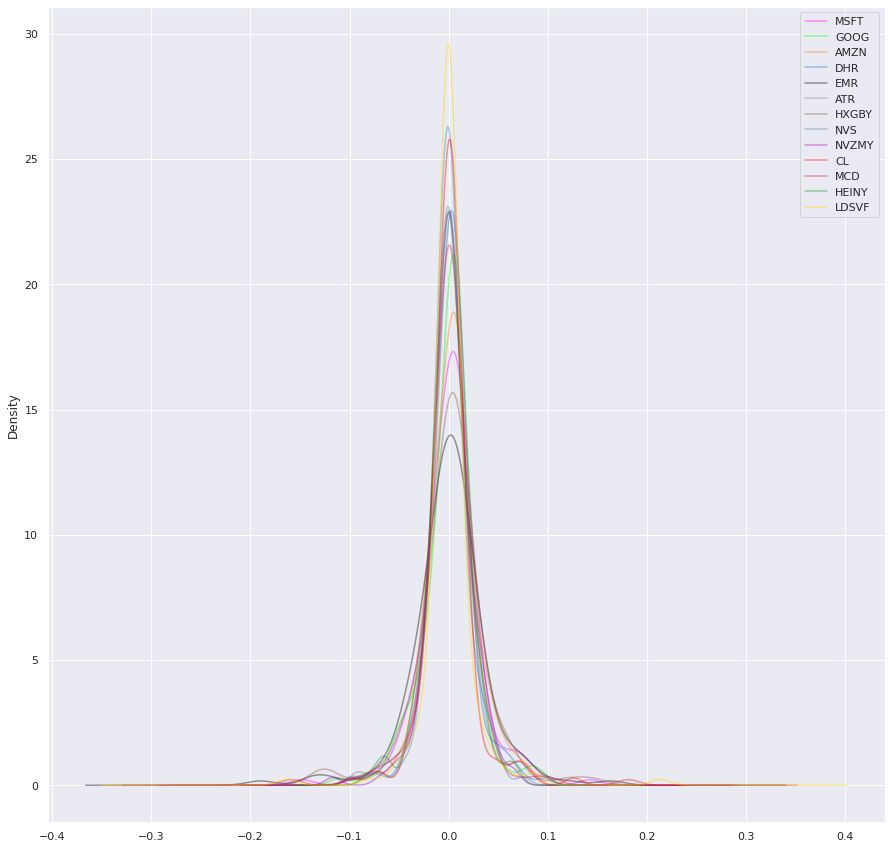

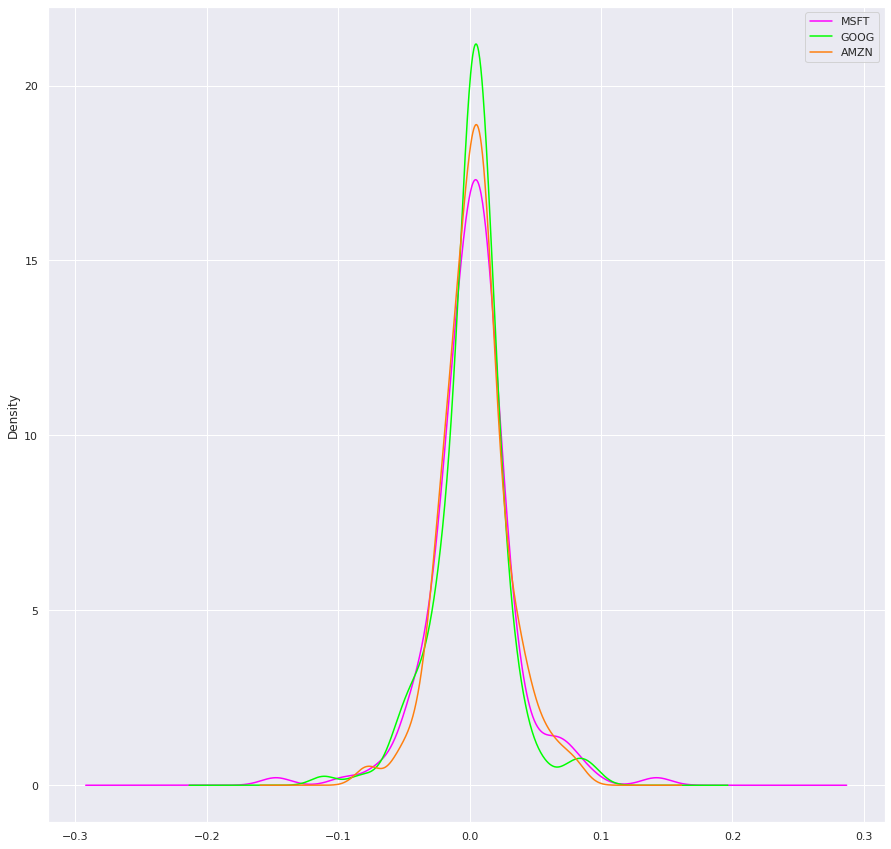

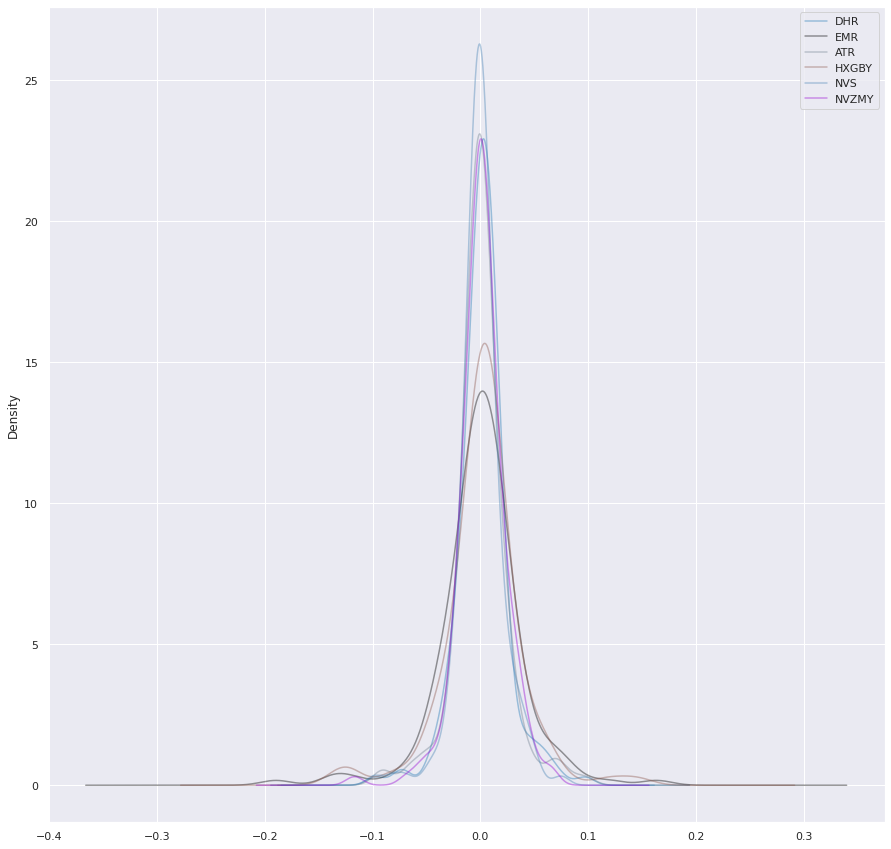

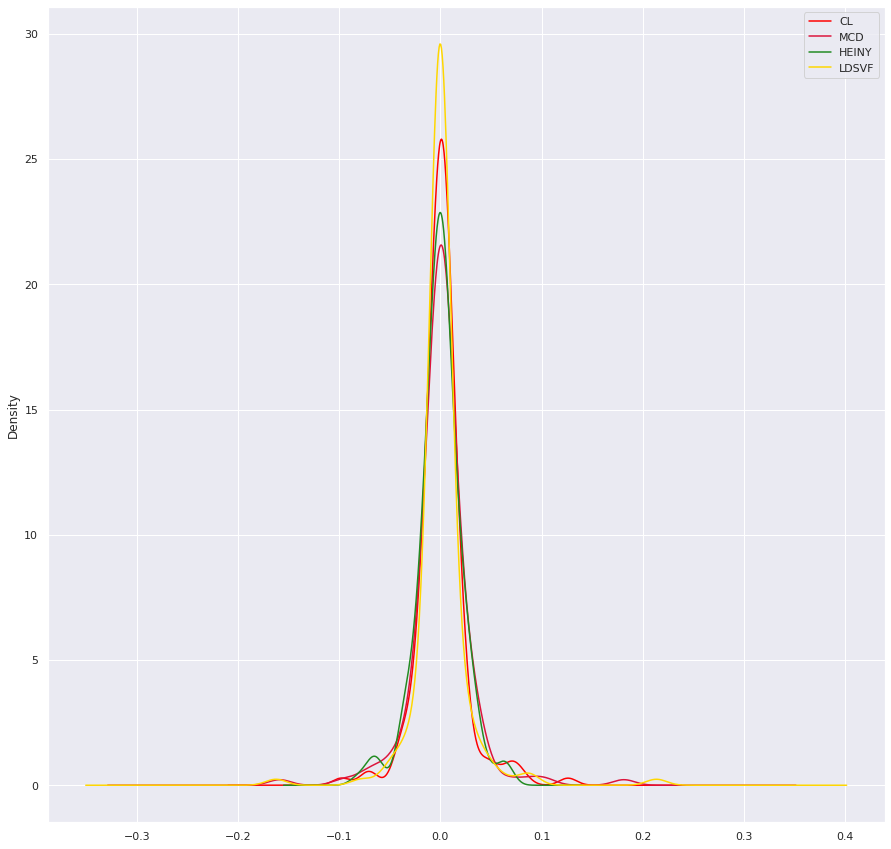

In [31]:
import seaborn as sns 
sns.set()
#sns.reset_orig
plt.figure()

color_list = [color_dict.get(x, _) for x in pf.columns]
df_returns.plot(kind='kde',color=color_list, figsize=(15,15), alpha=0.4)
plt.legend();

color_list = [color_dict.get(x, _) for x in pf1.columns]
df1_returns.plot(kind='kde',color = color_list, figsize=(15,15))
plt.legend();

color_list = [color_dict.get(x, _) for x in pf2.columns]
df2_returns.plot(kind='kde',color=color_list,figsize=(15,15), alpha=0.4)
plt.legend();

color_list = [color_dict.get(x, _) for x in pf3.columns]
df3_returns.plot(kind='kde',color=color_list, figsize=(15,15))
plt.legend();

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

** Try also creating some box plots comparing the returns. **

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

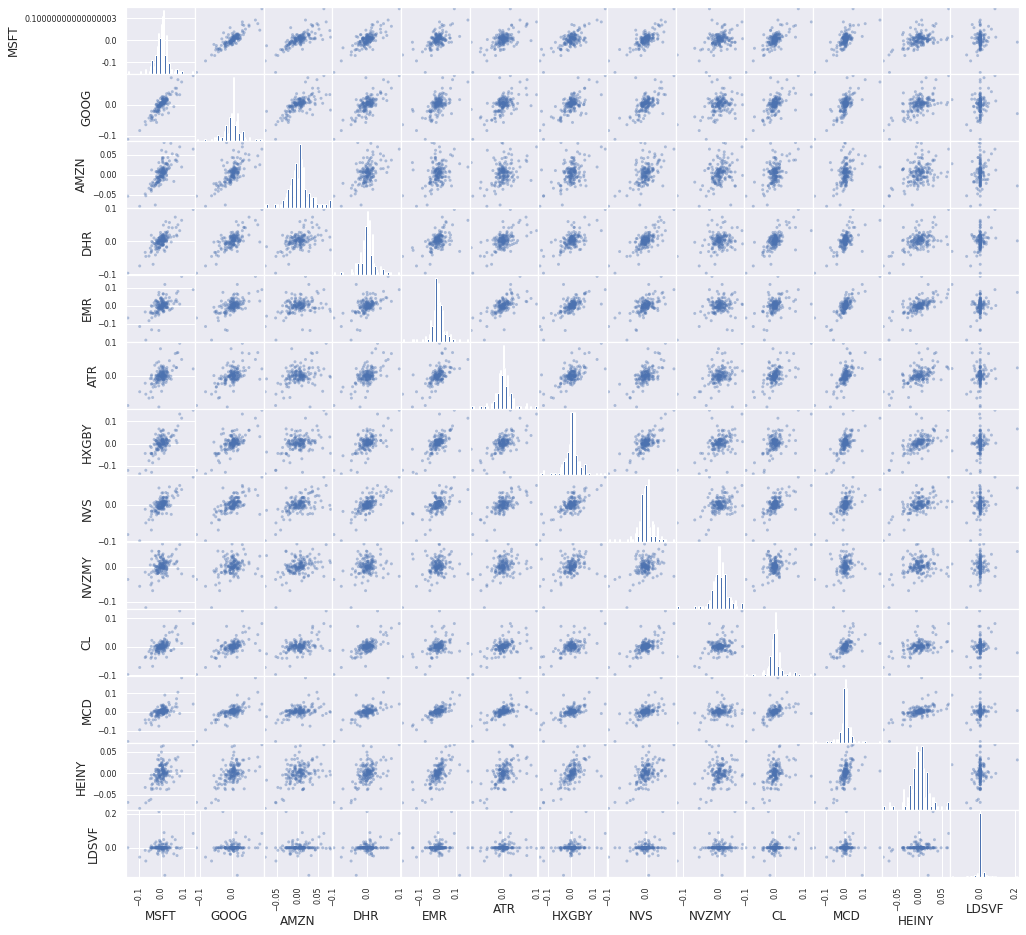

In [32]:
pd.plotting.scatter_matrix(df_returns, figsize=(16,16), alpha= 0.4,hist_kwds={'bins':50});

** It looks like Google and Microsoft do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


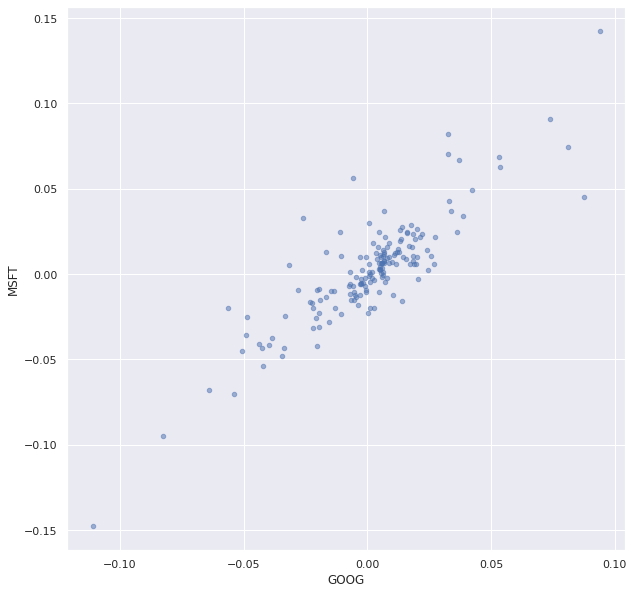

In [33]:
df_returns.plot(kind='scatter', x='GOOG', y='MSFT', alpha=0.5, figsize=(10,10));

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [34]:
#tesla['returns']
#(1+tesla['returns'])
#(1+tesla['returns']).cumprod()
pprint.pprint(df1_returns['MSFT'])
print('\n')
(1+df1_returns['MSFT']).cumprod()

2020-01-02         NaN
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
2020-01-08    0.015929
                ...   
2020-08-24    0.003145
2020-08-25    0.013009
2020-08-26    0.021620
2020-08-27    0.024553
2020-08-28    0.010283
Name: MSFT, Length: 166, dtype: float64




2020-01-02         NaN
2020-01-03    0.987548
2020-01-06    0.990101
2020-01-07    0.981073
2020-01-08    0.996700
                ...   
2020-08-24    1.340948
2020-08-25    1.358393
2020-08-26    1.387761
2020-08-27    1.421835
2020-08-28    1.436457
Name: MSFT, Length: 166, dtype: float64

In [35]:
#tesla['cumRet']=(1+tesla['returns']).cumprod()
#tesla.head(10)
#gm['cumRet']=(1+gm['returns']).cumprod()
#ford['cumRet']=(1+ford['returns']).cumprod()

df_cumReturns = initialize_df(symbol_list, startd, endd)
df_cumReturns = (1+df_returns).cumprod()
df_cumReturns.head()

df1_cumReturns = initialize_df(symbol_list, startd, endd)
df1_cumReturns = (1+df1_returns).cumprod()
df1_cumReturns.head()

df2_cumReturns = initialize_df(symbol_list, startd, endd)
df2_cumReturns = (1+df2_returns).cumprod()
df2_cumReturns.head()

df3_cumReturns = initialize_df(symbol_list, startd, endd)
df3_cumReturns = (1+df3_returns).cumprod()
df3_cumReturns.head()

,CL,MCD,HEINY,LDSVF
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.998531,0.996464,0.999439,1.000000
2020-01-06,1.005431,1.007670,1.021748,1.005652
2020-01-07,0.991632,1.009164,1.014187,1.023909
2020-01-08,1.016882,1.025499,1.017548,1.023909


<Figure size 432x288 with 0 Axes>

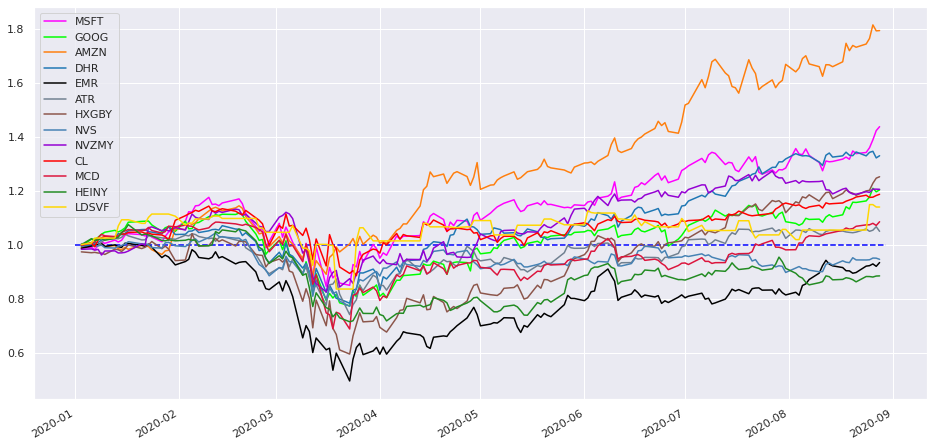

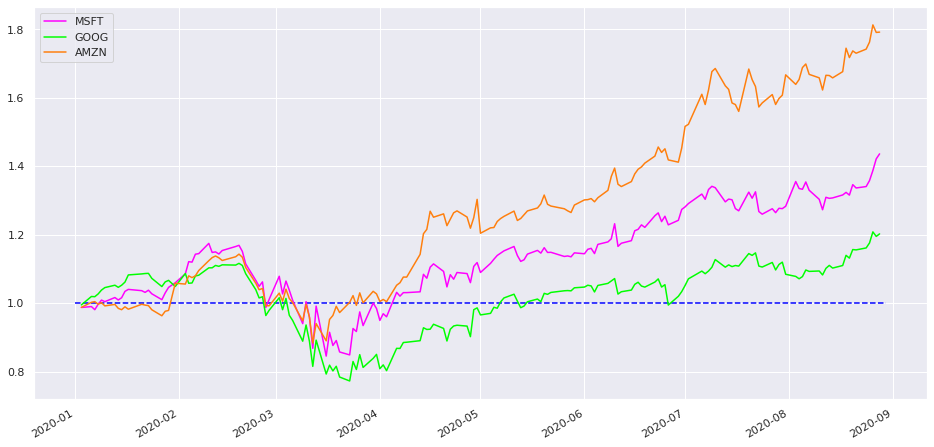

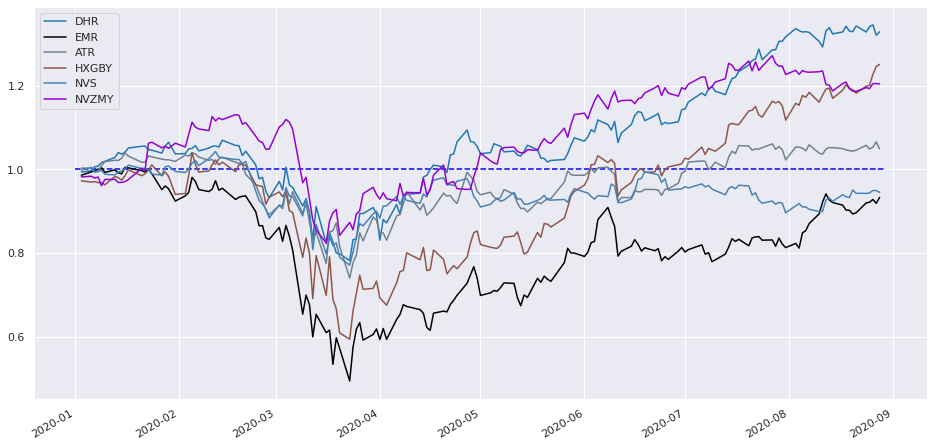

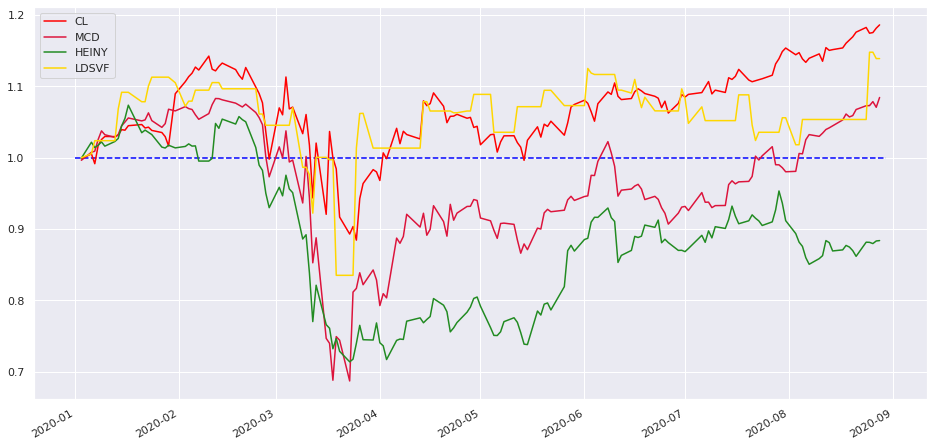

In [36]:
#tesla['cumRet'].plot(label='Tesla', figsize=(16,8))
#gm['cumRet'].plot(label='gm', figsize=(16,8))
#ford['cumRet'].plot(label='Ford', figsize=(16,8));
import seaborn as sns 
sns.set()
#sns.reset_orig
plt.figure()

color_list = [color_dict.get(x, _) for x in pf.columns]
df_cumReturns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in pf1.columns]
df_cumReturns[['MSFT','GOOG','AMZN']].plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in pf2.columns]
df2_cumReturns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in pf3.columns]
df3_cumReturns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

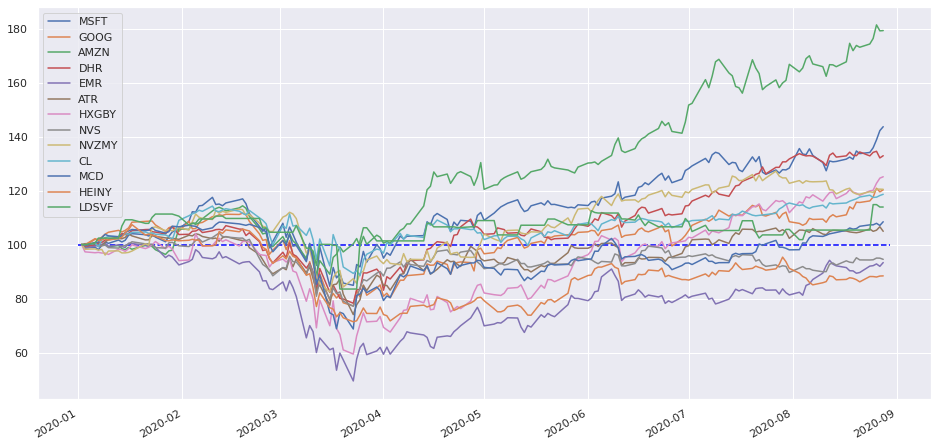

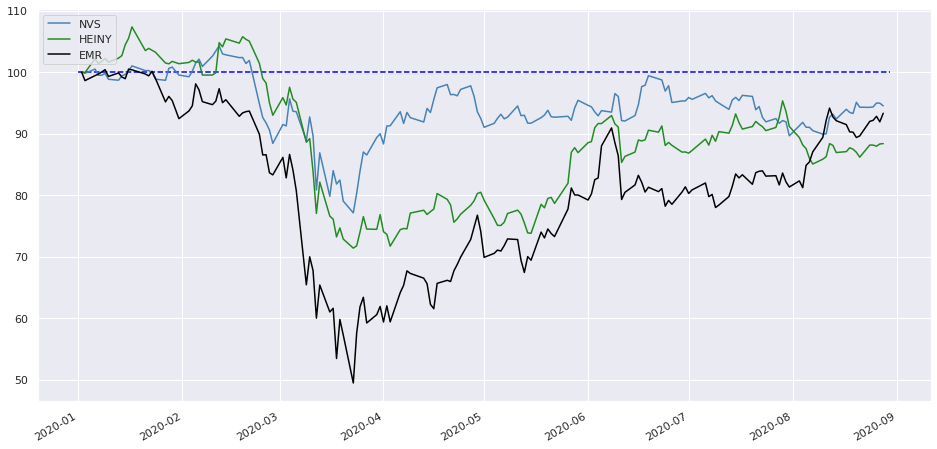

In [37]:
(pf / pf.iloc[0] * 100).plot(figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in ['NVS','HEINY','EMR']]
(pf[['NVS','HEINY','EMR']] / pf[['NVS','HEINY','EMR']].iloc[0] * 100).plot(color=color_list,figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

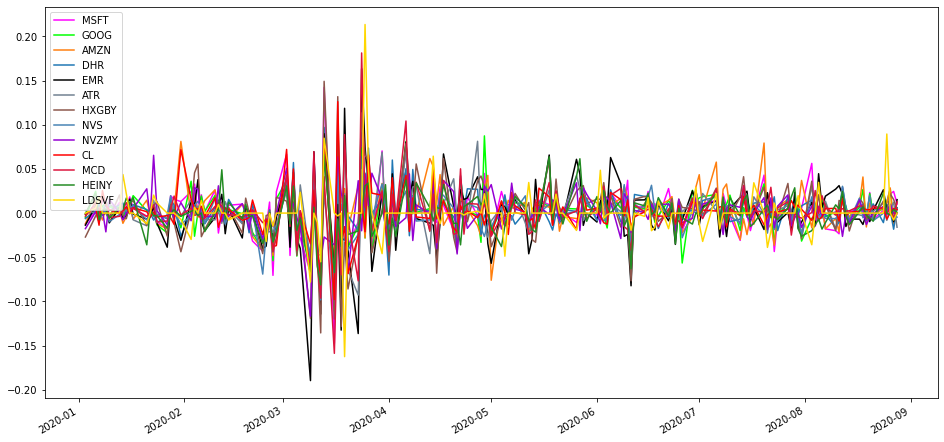

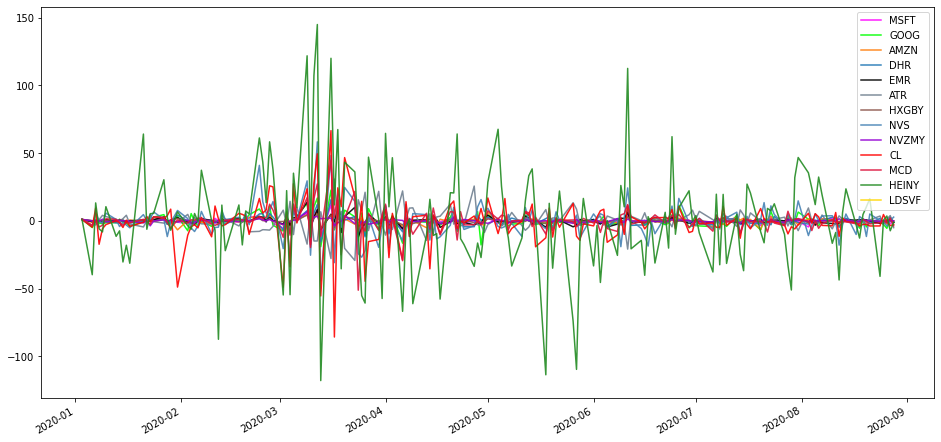

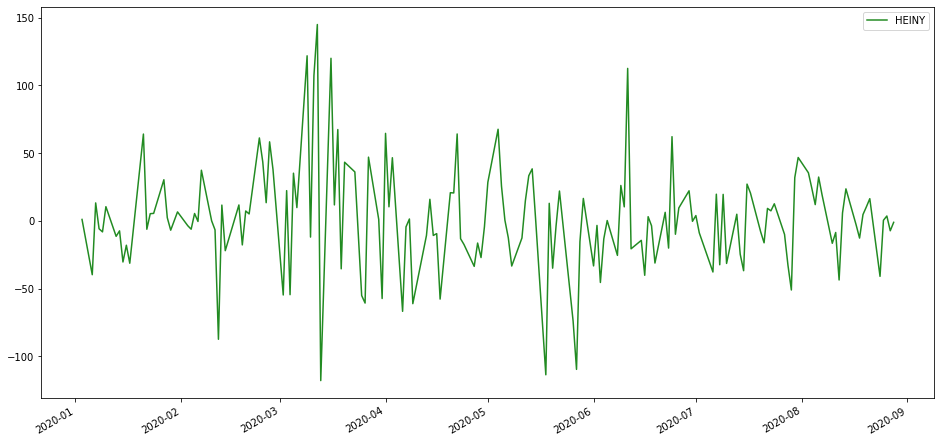

In [38]:
df_returns.head()
sns.reset_orig()

color_list = [color_dict.get(x, _) for x in pf.columns]
df_returns.plot(color=color_list, figsize=(16,8))
(df_returns / df_returns.iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.9);
(df_returns[['HEINY']] / df_returns[['HEINY']].iloc[1]).plot(color='forestgreen',figsize=(16,8));

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!

In [3]:
#del [_df]
#gc.collect()
#_df=pd.DataFrame()
symbol_list=['AAPL', 'AMZN', 'CSCO', 'MSFT']
path_list = create_path_list(symbol_list, root_path)
pprint.pprint(path_list)
df_aux1 = retrievePF(symbol_list, path_list, startd, endd,usecols)
df_aux1.head()
        

{'AAPL': '../data/AAPL/daily_AAPL.csv',
 'AMZN': '../data/AMZN/daily_AMZN.csv',
 'CSCO': '../data/CSCO/daily_CSCO.csv',
 'MSFT': '../data/MSFT/daily_MSFT.csv'}


,AAPL,AMZN,CSCO,MSFT
2020-01-02,74.5722,1898.01,47.6103,159.3574
2020-01-03,73.8472,1874.97,46.8335,157.3731
2020-01-06,74.4356,1902.88,47.0007,157.7799
2020-01-07,74.0855,1906.86,46.6959,156.3413
2020-01-08,75.2773,1891.97,46.7254,158.8316


#  Sharpe RATIO

In [8]:

symbol_list=['AAPL','AMZN','CSCO','MSFT']
startd='2012-01-01'
endd='2017-01-01'
for symbol in symbol_list:
    if symbol == 'AAPL':
        aapl = get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)

    elif symbol == 'AMZN':
        amzn = get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)
  
    elif symbol == 'CSCO':
        csco = get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)
 
    elif symbol == 'MSFT':
        msft = get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)


FileNotFoundError: [Errno 2] No such file or directory: '2012-01-01/data/AAPL'

In [ ]:
aapl.iloc[0]['adjusted_close']

In [ ]:
# cumulative returns:
for stock in (aapl, csco, amzn, msft):
    stock['cum_return'] = stock['adjusted_close'] / stock.iloc[0]['adjusted_close']

    

In [ ]:
aapl.head()

In [ ]:
aapl.tail()

In [ ]:
# a list of tuples (first element is the dataframe of the stock and second element is 0.3)
list(zip((aapl, csco, amzn, msft), [.3, .2, .4, .1]))

In [ ]:
# allocation to portfolio
# 30% aapl
# 20% amzn
# 40% csco
# 10% msft

for stock, weight in zip((aapl, csco, amzn, msft), [.3, .2, .4, .1]):
    stock['weight'] = stock['cum_return']*weight
    
    




In [ ]:
aapl.head()
# 30% of my money is in apple so this is my cum return portfolio wise

In [ ]:
#investing 1Mio $ - calculate the position value of each stock according to its weight in the portfolio
for stock in (aapl, csco, amzn, msft):
    stock['pos_value'] = stock['weight']*1000000
    
    

In [ ]:
aapl.head()

In [ ]:
all_pos_vals = [aapl['pos_value'], csco['pos_value'], amzn['pos_value'], msft['pos_value']]
#all_pos_vals
pf = pd.concat(all_pos_vals, axis = 1)
pf.columns = ['aapl', 'csco', 'amzn', 'msft']
pf.head()

In [ ]:
# total position
pf['total_pos']=pf.sum(axis=1)
pf.head()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
pf['total_pos'].plot(figsize=(10,8))
plt.title('total portfolio value ');

In [ ]:
pf.drop('total_pos', axis = 1).plot(figsize=(10,8));

In [ ]:
pf['daily_return']= pf['total_pos'].pct_change(1)
pf.head()

In [ ]:
pf['daily_return'].std()

In [ ]:
pf['daily_return'].mean()

In [ ]:
pf['daily_return'].plot(kind='kde', figsize=(4,5))

In [ ]:
cum_return = 100 * ((pf['total_pos'][-1] - pf['total_pos'][0])/pf['total_pos'][0] )
cum_return

In [ ]:
pf['total_pos'][-1]

In [ ]:
#calculate sharpe ratio assume risk-free rate to be zero
sr = pf['daily_return'].mean() / pf['daily_return'].std()
sr

In [ ]:
# annualize thi sr 
# asr should be above 1 

asr = (252**0.5)*sr
asr

# portfolio optimization
# - monte carlo
# - mathematical optimization by minimizing the negative sharpe ratio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
    

In [ ]:
import myalpha_util as myau
symbol_list=['AAPL','AMZN','CSCO','MSFT']
startd='2012-01-01'
endd='2017-01-01'
for symbol in symbol_list:
    if symbol == 'AAPL':
        aapl = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)

    elif symbol == 'AMZN':
        amzn = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)
  
    elif symbol == 'CSCO':
        csco = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol)
 
    elif symbol == 'MSFT':
        msft = myau.get_daily_symbol(symbol,startd,endd)
        print("symbol: " + symbol) 

In [ ]:
pf = pd.concat([aapl['adjusted_close'],csco['adjusted_close'],amzn['adjusted_close'], msft['adjusted_close']], axis=1)

pf.columns = ['aapl', 'csco', 'amzn', 'msft']

pf.head()

In [ ]:
#calculate annual mean of returns as % 
pf.pct_change(1).mean()*252

In [ ]:
pf.pct_change(1).corr()

In [ ]:
# we use log returns for algorithms especially for normalizations
log_ret= np.log(pf/pf.shift(1))

log_ret.head()


In [ ]:
log_ret.hist(bins=100, figsize=(12,8));

In [ ]:
log_ret.mean()

In [ ]:
log_ret.var()*252
#log_ret.std()*252**0.5

In [ ]:
log_ret.cov() * 252

In [ ]:
np.random.seed(101)
# to keep getting the same random weights

print(pf.columns)
weights = np.array(np.random.random(4))
print(weights)
# but they do not add up to 1

print('rebalance')
weights=weights/np.sum(weights)
print(weights)
np.sum(weights)


In [ ]:
print('expected portfolio return')
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print((log_ret.mean() * weights) * 252)
exp_ret
print(exp_ret)
print('\n expected volatility')
#denominator of sharp-ratio

exp_vol = np.sqrt(np.dot((weights.T),np.dot(log_ret.cov()*252, weights)))
print(exp_vol)

sr = exp_ret / exp_vol
print('\n sharpe ratio: ')
print(sr)


In [ ]:
import numpy as np
np.random.seed(101)
num_pf = 5000
all_weights = np.zeros((num_pf, len(pf.columns)))
ret_arr = np.zeros(num_pf)
vol_arr = np.zeros(num_pf)
sharpe_arr = np.zeros(num_pf)

for ind in range(num_pf):
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    # expected return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    #expected volatility
    vol_arr[ind] = np.sqrt(np.dot((weights.T),np.dot(log_ret.cov()*252, weights)))
    #sharpe ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]
    
print('done')





In [ ]:
print(sharpe_arr.max())
sharpe_arr


In [ ]:
sharpe_arr.argmax()

In [ ]:
print(sharpe_arr[2936])
all_weights[2936,:]

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

max_sr_ret = ret_arr[2936]
max_sr_vol = vol_arr[2936]
plt.scatter(max_sr_vol, max_sr_ret,  c='red')
           


# using ML approach

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)  * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sr = ret / vol
    return np.array([ret,vol,sr])

            

In [ ]:
from scipy.optimize import minimize 
import numpy as np


In [ ]:
#helper function
#minimize negative sharpe ratio which is the same as maximize sr
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [ ]:
log_ret.head()

In [ ]:
def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return np.sum(weights) - 1


In [ ]:
cons = ({'type': 'eq', 'fun':check_sum})
#defines a constraingt for minimize function - it says
# type will be equations and a function

In [ ]:
bounds = ((0,1),(0,1), (0,1),(0,1))
#sum of weights is 1 
init_guess = [0.25,0.25,0.25,0.25]

In [ ]:
#opt_results = minimize(neg_sharpe, )
help(minimize)


In [ ]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds,constraints=cons )
opt_results

In [ ]:
if (np.sum(opt_results.x)) == 1:
    print("ok")

get_ret_vol_sr(opt_results.x)


In [ ]:
# create an array of possible returns  y-values
frontier_y = np.linspace(0,0.3,100)
frontier_y

    

In [ ]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [ ]:
frontier_volatility = []
#for a possible return what is the risk
#in order to get the return/volatility combinations on the efficient frontier 
#we add the second constraint
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},{'type':'eq', 'fun':lambda w: (get_ret_vol_sr(w)[0]-possible_return)})
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    frontier_volatility.append(result['fun'])
    
    
frontier_volatility
    

In [ ]:
frontier_sr = frontier_y / frontier_volatility
print(frontier_sr.max())

print(frontier_sr.argmax())

max_sr_ret_calc = frontier_y[frontier_sr.argmax()]
max_sr_vol_calc = frontier_volatility[frontier_sr.argmax()]
print(frontier_volatility[frontier_sr.argmax()])
print(frontier_y[frontier_sr.argmax()])

In [ ]:
# calculated efficient frontier
plt.figure(figsize=(12,8))
plt.plot(frontier_volatility,frontier_y, 'g--');

#scatter-plot from monte carlo simulation
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

max_sr_ret = ret_arr[2936]
max_sr_vol = vol_arr[2936]
print('monte_carlo x-value-max: ', max_sr_vol)
print('monte_carlo y-value-max:', max_sr_ret)
plt.scatter(max_sr_vol, max_sr_ret,  c='black');
plt.axhline(max_sr_ret, color='gray',linestyle='--')
plt.axvline(max_sr_vol, color='gray', linestyle='--');

max_sr_ret = max_sr_ret_calc
max_sr_vol = max_sr_vol_calc
print('monte_carlo x-value-max: ', max_sr_vol)
print('monte_carlo y-value-max:', max_sr_ret)
plt.scatter(max_sr_vol, max_sr_ret,  c='red');
plt.axhline(max_sr_ret, color='gray',linestyle='--')
plt.axvline(max_sr_vol, color='gray', linestyle='--');
        

In [ ]:
frontier_sr = frontier_y / frontier_volatility
print(frontier_sr.max())

print(frontier_sr.argmax())

print(frontier_volatility[frontier_sr.argmax()])
print(frontier_y[frontier_sr.argmax()])
